# Aufgabe 1

a)

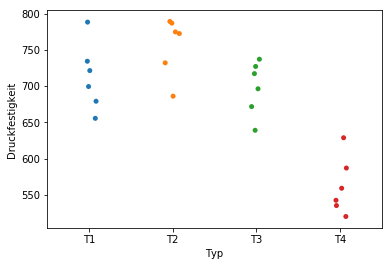

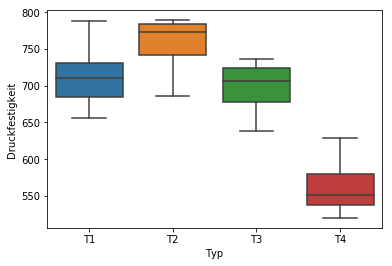

In [13]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

df=DataFrame({
"Typ": np.repeat(["T1", "T2", "T3", "T4"], [6, 6, 6, 6]),
"Druckfestigkeit" : [655.5, 788.3, 734.3, 721.4, 679.1, 699.4,789.2, 772.5, 786.9, 686.1, 732.1, 774.8,737.1, 639.0, 696.3, 671.7, 717.2, 727.1,535.1, 628.7, 542.4, 559.0, 586.9, 520.0

]
})

sns.stripplot(x="Typ", y="Druckfestigkeit", data=df)
plt.xlabel("Typ")
plt.ylabel("Druckfestigkeit")
plt.show()

sns.boxplot(x="Typ", y="Druckfestigkeit", data=df)
plt.xlabel("Typ")
plt.ylabel("Druckfestigkeit")
plt.show()


b)

In [12]:
from statsmodels.formula.api import ols

fit = ols("Druckfestigkeit~Typ", data=df).fit()
fit.params

Intercept    713.000000
Typ[T.T2]     43.933333
Typ[T.T3]    -14.933333
Typ[T.T4]   -150.983333
dtype: float64

Die Parametrisierung wurde so gewählt, dass  μ=μ1=713 , d.h.  τ1=0 . Die behandlungsspezifischen Abweichungen sind  τ2=43.93333 ,  τ3=-14.93333  und  τ4=-150.98333.

c)

In [10]:
from statsmodels.stats.anova import anova_lm

anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
Typ,3.0,127374.754583,42458.251528,25.094289,5.525450e-07
Residual,20.0,33838.975000,1691.948750,NaN,NaN


Nullhypothese kann verworfen, da es einen signifikanten Unterschied zwischen der Druckfestigkeit der Typen gibt.

# Aufgabe 2

a)

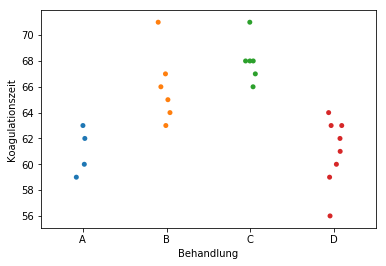

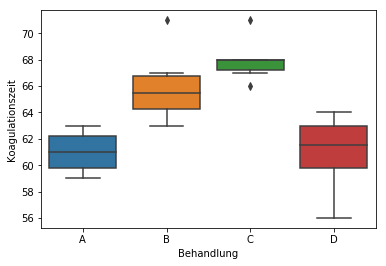

In [38]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

df=DataFrame({
"Behandlung": np.repeat(["A", "B", "C", "D"], [4, 6, 6, 8]),
"Koagulationszeit" : [
    62, 60, 63, 59,
    63, 67, 71, 64, 65, 66,
    68, 66, 71, 67, 68, 68,
    56, 62, 60, 61, 63, 64, 63, 59
]
})

sns.stripplot(x="Behandlung", y="Koagulationszeit", data=df)
plt.xlabel("Behandlung")
plt.ylabel("Koagulationszeit")
plt.show()

sns.boxplot(x="Behandlung", y="Koagulationszeit", data=df)
plt.xlabel("Behandlung")
plt.ylabel("Koagulationszeit")
plt.show()


b) 
grand_mean = (62+60+63+59+63+67+71+64+65+66+68+66+71+67+68+68+56+62+60+61+63+64+63+59)/24 = 64
mean_A = (62+60+63+59)/4 = 61
mean_B = (63+67+71+64+65+66)/6 = 66
mean_C = (68+66+71+67+68+68)/6 = 68
mean_D = (56+62+60+61+63+64+63+59)/8 = 61
   
check with python

In [37]:
grand_mean = np.mean(df['Koagulationszeit'])
df_A = df[df['Behandlung'] == 'A']
df_B = df[df['Behandlung'] == 'B']
df_C = df[df['Behandlung'] == 'C']
df_D = df[df['Behandlung'] == 'D']
mean_A = np.mean(df_A['Koagulationszeit'])
mean_B = np.mean(df_B['Koagulationszeit'])
mean_C = np.mean(df_C['Koagulationszeit'])
mean_D = np.mean(df_D['Koagulationszeit'])
print('grand_mean =', grand_mean)
print('mean_A =', mean_A)
print('mean_B =', mean_B)
print('mean_C =', mean_C)
print('mean_D =', mean_D)

grand_mean = 64.0
mean_A = 61.0
mean_B = 66.0
mean_C = 68.0
mean_D = 61.0


c) 
Var_A = (1+1+4+4)/(4-1) = 3.33
Var_B = (9+1+25+4+1)/(6-1) = 8
Var_C = (4+9+1)/(6-1) = 2.8
Var_D = (25+1+1+4+9+4+4)/(8-1) = 6.86

d)
SSE = (1+1+4+4)+(9+1+25+4+1)+(4+9+1)+(25+1+1+4+9+4+4) = 112
DFE = n-g = 24-4 = 20
MSE = SSE/DFE = 112/20 = 5.6

e)
SSG = 6*((61-64)^2 + (66-64)^2 + (68-64)^2 + (61-64)^2) = 6*(9+4+16+9) = 228
DFG = g-1 = 3
MSG = SSG/DFG = 76

f) check d) & e)

In [62]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

fit = ols("Koagulationszeit~Behandlung", data=df).fit()

anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
Behandlung,3.0,228.0,76.0,13.571429,0.000047
Residual,20.0,112.0,5.6,NaN,NaN


Es besteht ein signifikanter Unterschied zwischen mind. 2 Behandlungsarten in Bezug auf die Koagulationszeit. Somit kann die Nullhypothese verworfen werden.